In [2]:
import merg_rates3 as merg_rates
import my_sham_hack3 as sham
import numpy as np
import pandas as pd
import random
import time
import staudt_utils3 as sutils

from progressbar import ProgressBar
from itertools import cycle, islice

In [3]:
import matplotlib as mpl 
#mpl.use('Agg')
import matplotlib.pyplot as plt 
from matplotlib import rcParams
from matplotlib.lines import Line2D
from cycler import cycler
%matplotlib inline

rcParams['mathtext.fontset'] = 'dejavuserif'
rcParams['font.family'] = 'serif' 
rcParams['xtick.labelsize'] = 16
rcParams['ytick.labelsize'] = 16
rcParams['axes.grid']=True
rcParams['axes.titlesize']=24
rcParams['axes.labelsize']=20
rcParams['axes.titlepad']=15
rcParams['legend.frameon'] = True
rcParams['legend.facecolor']='white'
rcParams['legend.fontsize']=18
#rcParams['axes.prop_cycle'] = cycler(color='bgrcmyk')
#rcParams['axes.prop_cycle'] = prop_cycle_prev

In [5]:
htpm=merg_rates.HalTreepmClass()

# in merg_rates3.HalTreepm():
  read /data1/arwetzel/lcdm250/snapshot.txt
  read  5177765 subhalo from subhalo_tree_00.dat
  read  5407196 subhalo from subhalo_tree_01.dat
  read  5485481 subhalo from subhalo_tree_02.dat
  read  5517336 subhalo from subhalo_tree_03.dat
  read  5548084 subhalo from subhalo_tree_04.dat
  read  5583078 subhalo from subhalo_tree_05.dat
  read  5615345 subhalo from subhalo_tree_06.dat
  read  5650410 subhalo from subhalo_tree_07.dat
  read  5682696 subhalo from subhalo_tree_08.dat
  read  5715688 subhalo from subhalo_tree_09.dat
  read  5748795 subhalo from subhalo_tree_10.dat
  read  5779167 subhalo from subhalo_tree_11.dat
  read  5805949 subhalo from subhalo_tree_12.dat
  read  5824060 subhalo from subhalo_tree_13.dat
  read  5837797 subhalo from subhalo_tree_14.dat
  read  5841491 subhalo from subhalo_tree_15.dat
  read  5836226 subhalo from subhalo_tree_16.dat
  read  5823060 subhalo from subhalo_tree_17.dat
  read  5795900 subhalo from subhalo_tree_18

In [6]:
scat=0.
mmin=3.

st=time.time()

mar_tpm=merg_rates.GalTreepmClass(htpm,
        source=merg_rates.bld_smf_compo('marchesini'),scat=scat,
        mmin=mmin)
per_tpm=merg_rates.GalTreepmClass(htpm,
        source=merg_rates.bld_smf_compo('perez'),scat=scat,
        mmin=mmin)
san_tpm=merg_rates.GalTreepmClass(htpm,
        source=merg_rates.bld_smf_compo('santini'),scat=scat,
        mmin=mmin)

running SHAM


100% |########################################################################|


running SHAM


100% |########################################################################|


running SHAM


100% |########################################################################|


building main progenitor tree:


100% |########################################################################|


building merger tree:
2467383 galaxies in snapshot 34
1657 merge with larger galaxies
2906961 galaxies in snapshot 33
7578 merge with larger galaxies
3267446 galaxies in snapshot 32
19635 merge with larger galaxies
3591830 galaxies in snapshot 31
31754 merge with larger galaxies
3901457 galaxies in snapshot 30
43747 merge with larger galaxies
4187628 galaxies in snapshot 29
44212 merge with larger galaxies
4451504 galaxies in snapshot 28
13518 merge with larger galaxies
4697199 galaxies in snapshot 27
4910 merge with larger galaxies
4914942 galaxies in snapshot 26
2039 merge with larger galaxies
5105362 galaxies in snapshot 25
2149 merge with larger galaxies
5270374 galaxies in snapshot 24
3236 merge with larger galaxies
5409626 galaxies in snapshot 23
4205 merge with larger galaxies
5527314 galaxies in snapshot 22
5538 merge with larger galaxies
5620673 galaxies in snapshot 21
6291 merge with larger galaxies
5697344 galaxies in snapshot 20
7312 merge with larger galaxies
5753867 galax

47174 merge with larger galaxies
building main progenitor tree:


100% |########################################################################|


building merger tree:
2467383 galaxies in snapshot 34
1657 merge with larger galaxies
2906961 galaxies in snapshot 33
7578 merge with larger galaxies
3267446 galaxies in snapshot 32
19635 merge with larger galaxies
3591830 galaxies in snapshot 31
5157 merge with larger galaxies
3901457 galaxies in snapshot 30
3277 merge with larger galaxies
4187628 galaxies in snapshot 29
5055 merge with larger galaxies
4451504 galaxies in snapshot 28
12786 merge with larger galaxies
4697199 galaxies in snapshot 27
25970 merge with larger galaxies
4914942 galaxies in snapshot 26
41437 merge with larger galaxies
5105362 galaxies in snapshot 25
63627 merge with larger galaxies
5270374 galaxies in snapshot 24
83817 merge with larger galaxies
5409626 galaxies in snapshot 23
85356 merge with larger galaxies
5527314 galaxies in snapshot 22
86644 merge with larger galaxies
5620673 galaxies in snapshot 21
87519 merge with larger galaxies
5697344 galaxies in snapshot 20
87121 merge with larger galaxies
5753867 

47174 merge with larger galaxies
building main progenitor tree:


100% |########################################################################|


building merger tree:
2467383 galaxies in snapshot 34
1657 merge with larger galaxies
2906961 galaxies in snapshot 33
7578 merge with larger galaxies
3267446 galaxies in snapshot 32
19635 merge with larger galaxies
3591830 galaxies in snapshot 31
31754 merge with larger galaxies
3901457 galaxies in snapshot 30
43747 merge with larger galaxies
4187628 galaxies in snapshot 29
55190 merge with larger galaxies
4451504 galaxies in snapshot 28
64462 merge with larger galaxies
4697199 galaxies in snapshot 27
71716 merge with larger galaxies
4914942 galaxies in snapshot 26
77090 merge with larger galaxies
5105362 galaxies in snapshot 25
81869 merge with larger galaxies
5270374 galaxies in snapshot 24
83817 merge with larger galaxies
5409626 galaxies in snapshot 23
85356 merge with larger galaxies
5527314 galaxies in snapshot 22
86644 merge with larger galaxies
5620673 galaxies in snapshot 21
87519 merge with larger galaxies
5697344 galaxies in snapshot 20
87121 merge with larger galaxies
57538

In [8]:
def get_evo_dic(tpm,Mcond):
    cat=tpm.galcat
    Mwid=0.2   
    m0s=cat[0]['m.star']
    inrange=(m0s<Mcond+Mwid/2.)&(m0s>Mcond-Mwid/2.)
    ms={}
    mrats={}
    
    hi0s=np.arange(len(m0s))[inrange]
    pbar=ProgressBar()
    for hi0 in pbar(hi0s):
        ms_hi0=[cat[0]['m.star'][hi0]]
        mrats_hi0=[1.]
        for zi in range(1,35):
            mpbr=cat[zi]['gal.mp.branch']
            if hi0 in mpbr:
                hi=mpbr[hi0]
                ms_hi0_z=cat[zi]['m.star'][hi]
                ms_hi0+=[ms_hi0_z]
                mrats_hi0+=[10.**(ms_hi0_z-ms_hi0[0])]
            else:
                ms_hi0+=[0.]
                mrats_hi0+=[np.nan]
        ms[hi0]=np.array(ms_hi0)
        mrats[hi0]=np.array(mrats_hi0)
    return ms,mrats

def plt_sample(ms,N,nam,M0,alpha,colorful=False,showavg=True):
    hi0s_all=np.array(list(ms.keys()))
    avg_ms=np.sum([ms[hi0] for hi0 in hi0s_all],axis=0)/hi0s_all.size
    hi0s=random.sample(list(hi0s_all),N)
    ms_sam={hi0: ms[hi0] for hi0 in hi0s}
    
    zis=np.arange(35)
    zs=np.array([htpm.subcat[zi].snap['z'] for zi in zis])
    
    fig=plt.figure(figsize=(8,6))
    ax=fig.add_subplot(111)
    if colorful:
        cols = mpl.cm.rainbow(np.linspace(0, 1, N))
    else:
        cols = np.repeat('b',N)
    for i,hi0 in enumerate(hi0s):
        ax.plot(zs,ms[hi0],'-',color=cols[i]
                #,alpha=0.06
                ,alpha=alpha
               )
    if showavg:
        ax.plot(zs,avg_ms,'-',lw=4,color=(0./255.,1,1),label='average')
        ax.legend(loc='lower left')
    ax.set_ylim(1,None)
    ax.set_xlabel('$z$')
    ax.set_ylabel('log $m_\star/$M$_\odot$')
    plt.suptitle('{0}-based'.\
                 format(nam),size=22,y=1.01)
    ax.set_title('{1:d} randomly sampled galaxies of $m_{{\star,0}}=10^{{{0:0.1f}}}$ M$_\odot$'.\
                 format(M0,N),size=17)
    plt.show()

## Santini

100% |########################################################################|


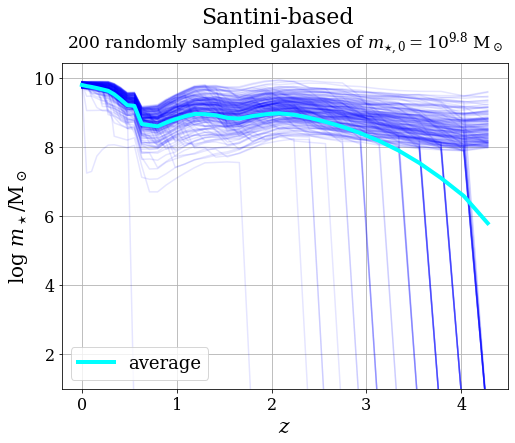

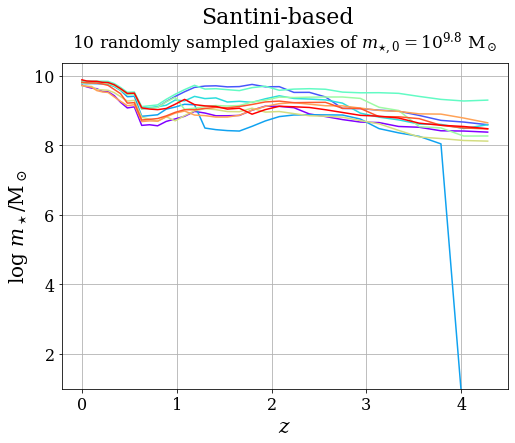

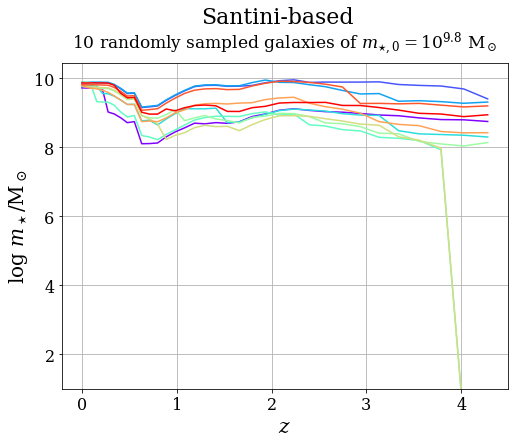

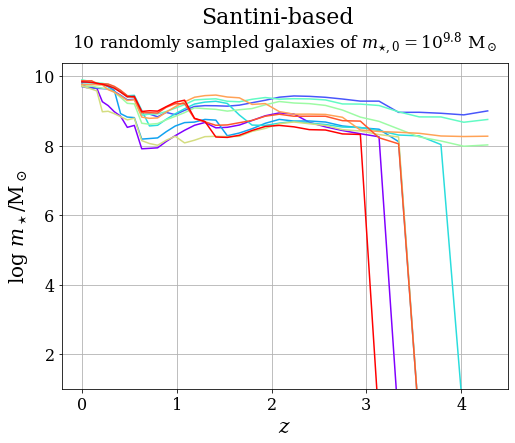

In [9]:
ms_evo_san098, mrats_evo = get_evo_dic(san_tpm,9.8)

plt_sample(ms_evo_san098,200,'Santini',9.8,0.1,colorful=False,
           showavg=True)

i=0
while i<3:
    plt_sample(ms_evo_san098,10,'Santini',9.8,1,colorful=True,
               showavg=False)
    i+=1

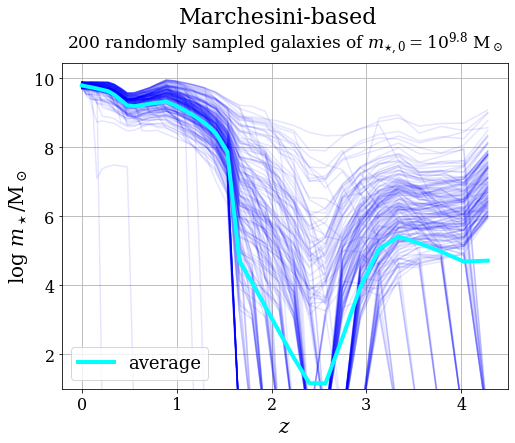

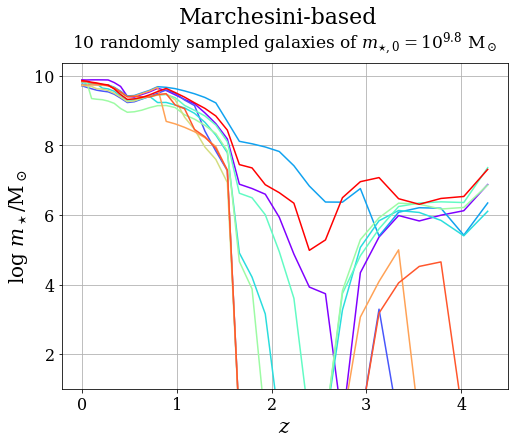

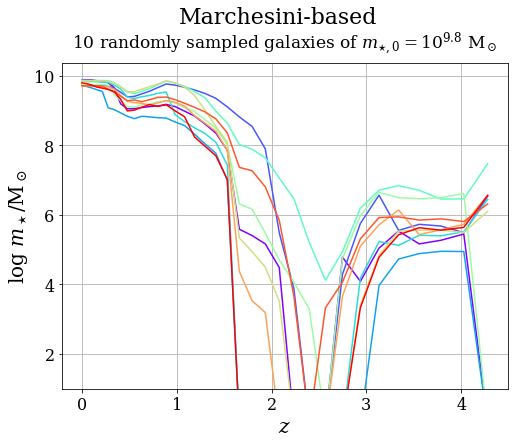

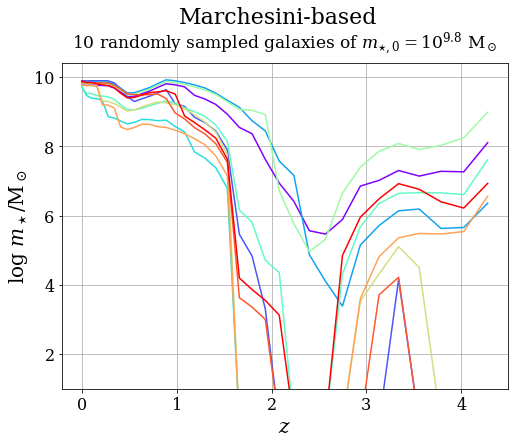

In [131]:
#ms_evo_mar098 = get_evo_dic(mar_tpm,9.8)[0]

plt_sample(ms_evo_mar098,200,'Marchesini',9.8,0.1,colorful=False,
           showavg=True)

i=0
while i<3:
    plt_sample(ms_evo_mar098,10,'Marchesini',9.8,1,colorful=True,
               showavg=False)
    i+=1

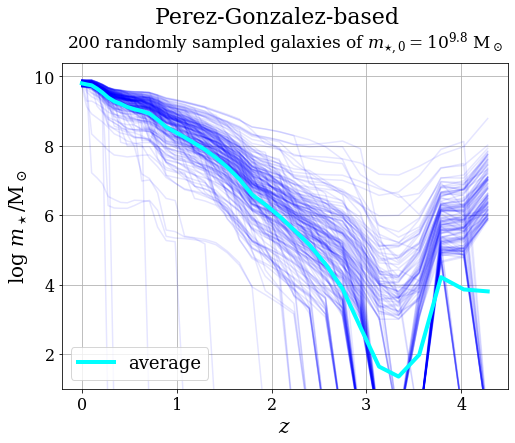

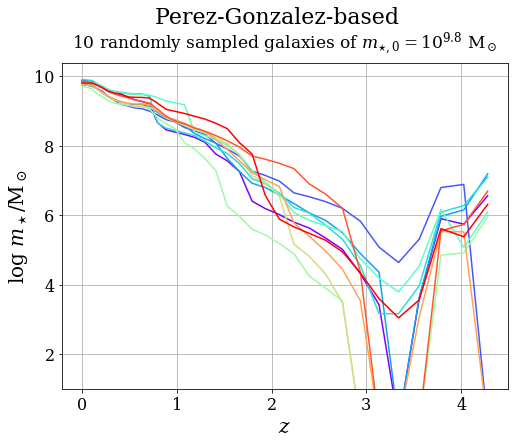

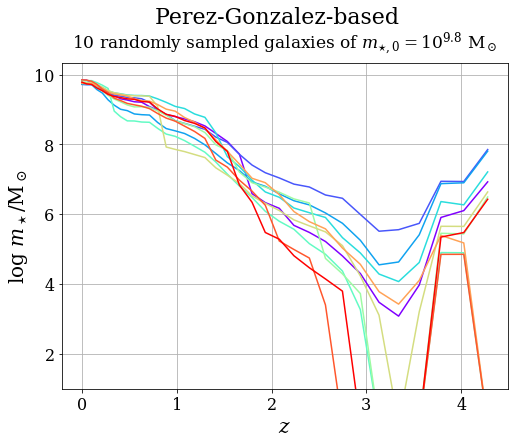

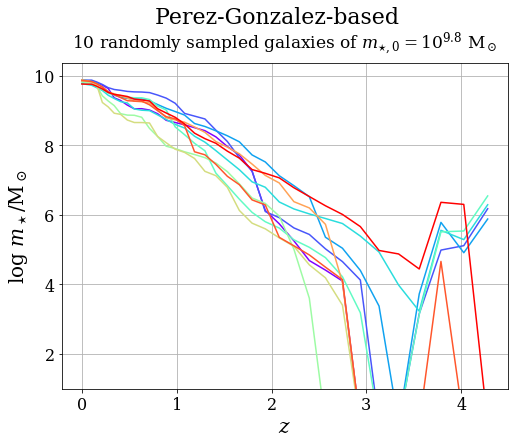

In [134]:
#ms_evo_per098, mrats_evo = get_evo_dic(per_tpm,9.8)

plt_sample(ms_evo_per098,200,'Perez-Gonzalez',9.8,0.1,colorful=False,
           showavg=True)

i=0
while i<3:
    plt_sample(ms_evo_per098,10,'Perez-Gonzalez',9.8,1,colorful=True,
               showavg=False)
    i+=1

# Reimports and unbound method creations

In [39]:
import importlib
importlib.reload(merg_rates)
importlib.reload(sham)

from merg_rates3 import GalTreepmClass
from merg_rates3 import HalTreepmClass

#unbound methods for testing
mp_tree=HalTreepmClass.mp_tree
merg_tree=HalTreepmClass.merg_tree
quench_frac_ft=GalTreepmClass.quench_frac_ft
hgram_dat_ft=GalTreepmClass.hgram_dat_ft
shmr_sham=HalTreepmClass.shmr_sham
shmr_avg=HalTreepmClass.shmr_avg

# Comparing dn/dlogm slopes

In [30]:
def num_ratio(gtpm,zi,M,lograt,plusmin):
    allms=gtpm.galcat[zi][gtpm.gmtype]
    inrng_M=(allms<M+plusmin)&(allms>M-plusmin)
    N_M=float(np.sum(inrng_M))
    inrng_rat=(allms<M+plusmin)&(allms>M-plusmin+lograt)
    N_m=float(np.sum(inrng_rat))
    return N_m/N_M
print(num_ratio(san_tpm,19,9., -1.,0.05))
print(num_ratio(per_tpm,19,7.1,-1.,0.05))
print(num_ratio(mar_tpm,19,7.9,-1.,0.05))

23.39598397072916
15.607756430503866
24.80824522545865


In [31]:
#print(num_ratio(san_tpm,22,9., -1.,0.05))
#print(num_ratio(per_tpm,22,7.1,-1.,0.05))
print(num_ratio(mar_tpm,22,3.1,-1.,0.05))

1.500453926463913


In [41]:
allms=mar_tpm.galcat[22][mar_tpm.gmtype]
isM=(allms<3.1+0.05)&(allms>2.1-0.05)
print(len(allms[isM]))

13222


In [24]:
def candidate_rngs(evo_dict,gtpm,N_samp):
    hi0s=np.array(list(evo_dict.keys()))
    zis=np.arange(35)
    allmss=np.array([gtpm.galcat[zi][gtpm.gmtype] for zi in zis])
    #Mss=np.array([[evo_dict[hi0][zi] for hi0 in hi0s] for zi in zis])

    Ns=[]
    for zi in zis:
        N=0
        pbar=ProgressBar()
        for hi0 in pbar(evo_dict):
            N+=np.sum((allmss[zi]>=evo_dict[hi0][zi]-1.)
                      & (allmss[zi]<=evo_dict[hi0][zi])) 
        
        #Ns+=[np.average([np.sum((allmss[zi]>=Mss[zi][hi]-1.)
        #                        & (allmss[zi]<=Mss[zi][hi])) 
        #                 for hi in range(Mss.shape[1])])]
        Ns+=[N]
    return Ns
            
Ns_san=candidate_rngs(ms_evo_san098,san_tpm)
print(Ns_san)

100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|
100% |########################################################################|


KeyboardInterrupt: 

In [69]:
def candidate_rngs(evo_dict,gtpm):
    hi0s=np.array(list(evo_dict.keys()))
    
    hi0s_all=np.array(list(ms.keys()))
    avg_ms=np.sum([ms[hi0] for hi0 in hi0s_all],axis=0)/hi0s_all.size
    hi0s=random.sample(list(hi0s_all),N)

    
    zis=np.arange(35)
    
    Ns=[]
    for zi in zis:
        N=0
        print(gtpm.galcat[zi][gtpm.gmtype])
        allms=gtpm.galcat[zi][gtpm.gmtype]
        allms.sort()
        print(allms)
        pbar=ProgressBar()
        hi0is=np.argsort([evo_dict[hi0][zi] for hi0 in hi0s])
        lower=0
        upper=0
        for hi0 in pbar(hi0s[hi0is]):
            print(hi0)
            try:
                upper=sutils.match(evo_dict[hi0][zi],allms[upper:],'leq')
            except ValueError:
                continue
            lower=sutils.match(evo_dict[hi0][zi],allms[lower:],'geq')
            N+=upper-lower
        Ns+=[N]
    return Ns
Ns_san=candidate_rngs(ms_evo_san098,san_tpm)

[ 0.        0.        0.       ... 11.745103 11.763949 11.794606]
[ 0.        0.        0.       ... 11.745103 11.763949 11.794606]


2638963
421644
4875042
4562557
4874873
2728963
744263
2938085
3418209
4957849
3652962
3262778
4783392
3265593
4615097
4066677
575491
166117
4873282
1492852
4780420
1648893
2543771
3699384
4379006
5147770
4215
3724606
3325964
4149037
4734408
1687149
1925394
2532275
280348
935476
3353387
195534
3845196
3970695
793744
3664463
3500302
1938363
4715608


KeyboardInterrupt: 